# Ngoc Ha
# STAT 453
# Lab 4

In [2]:
library(readxl)
library(fitdistrplus)
library(boot)

## 1. pgatour2006.xlsx analysis

### (1a) Summarize

In [3]:
pga <- read_excel('pgatour2006.xlsx')

In [4]:
str(pga)

Classes 'tbl_df', 'tbl' and 'data.frame':	196 obs. of  11 variables:
 $ Name              : chr  "Aaron Baddeley" "Adam Scott" "Alex Aragon" "Alex Cejka" ...
 $ PrizeMoney        : num  60661 262045 3635 17516 16683 ...
 $ AveDrivingDistance: num  288 301 303 289 288 ...
 $ DrivingAccuracy   : num  60.7 62 51.1 66.4 63.2 ...
 $ GIR               : num  58.3 69.1 59.1 67.7 64 ...
 $ PuttingAverage    : num  1.75 1.77 1.79 1.78 1.76 ...
 $ BirdieConversion  : num  31.4 30.4 29.9 29.3 29.3 ...
 $ SandSaves         : num  54.8 53.6 37.9 45.1 52.4 ...
 $ Scrambling        : num  59.4 57.9 50.8 54.8 57.1 ...
 $ BounceBack        : num  19.3 19.4 16.8 17.1 18.2 ...
 $ PuttsPerRound     : num  28 29.3 29.2 29.5 28.9 ...


#### 10% trimmed mean

In [5]:
sapply(pga[,2:11], mean, trim = 0.1)

PrizeMoney AveDrivingDistance    DrivingAccuracy                GIR 
      40027.215190         289.308861          63.312785          65.269367 
    PuttingAverage   BirdieConversion          SandSaves         Scrambling 
          1.779329          29.014620          48.979937          57.500886 
        BounceBack      PuttsPerRound 
         19.567658          29.190253

#### Standard deviation

In [6]:
sapply(pga[,2:11], sd)

PrizeMoney AveDrivingDistance    DrivingAccuracy                GIR 
      6.390295e+04       8.730509e+00       5.413023e+00       2.722364e+00 
    PuttingAverage   BirdieConversion          SandSaves         Scrambling 
      2.472813e-02       2.206556e+00       5.828313e+00       3.162257e+00 
        BounceBack      PuttsPerRound 
      2.806113e+00       4.417023e-01

#### Summary

In [7]:
summary(pga[,2:11])

   PrizeMoney     AveDrivingDistance DrivingAccuracy      GIR       
 Min.   :  2240   Min.   :265.9      Min.   :49.75   Min.   :56.87  
 1st Qu.: 17369   1st Qu.:283.6      1st Qu.:59.76   1st Qu.:63.52  
 Median : 36645   Median :288.2      Median :63.24   Median :65.36  
 Mean   : 50891   Mean   :289.5      Mean   :63.38   Mean   :65.19  
 3rd Qu.: 57915   3rd Qu.:295.5      3rd Qu.:66.97   3rd Qu.:66.77  
 Max.   :662771   Max.   :319.6      Max.   :78.43   Max.   :74.15  
 PuttingAverage  BirdieConversion   SandSaves       Scrambling   
 Min.   :1.712   Min.   :23.17    Min.   :33.91   Min.   :49.02  
 1st Qu.:1.763   1st Qu.:27.51    1st Qu.:45.13   1st Qu.:55.26  
 Median :1.778   Median :29.01    Median :48.66   Median :57.65  
 Mean   :1.780   Mean   :28.98    Mean   :48.97   Mean   :57.49  
 3rd Qu.:1.796   3rd Qu.:30.55    3rd Qu.:52.87   3rd Qu.:59.46  
 Max.   :1.851   Max.   :35.66    Max.   :63.64   Max.   :66.45  
   BounceBack    PuttsPerRound  
 Min.   :12.29   Min. 

### (1b)

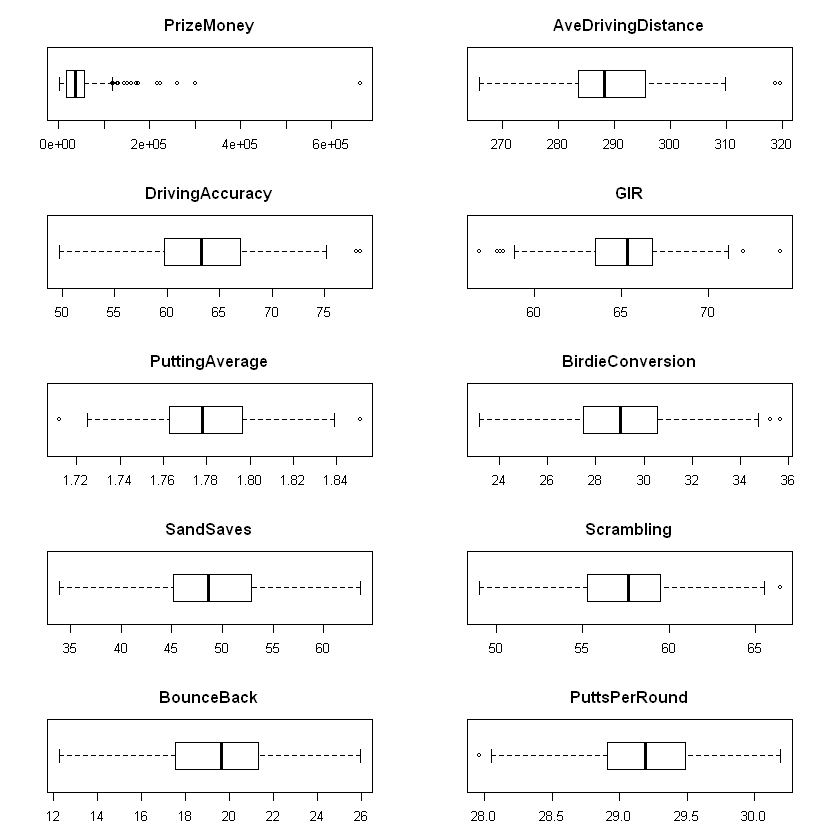

In [8]:
j <- 2
par(mfrow = c(5,2), mar = c(3,3,3,3))
for (i in pga[,2:11]) {
    boxplot(i, horizontal = T, main = names(pga)[j])
    j <- j+1
}

### (1c) Density histogram of AveDrivingDistance

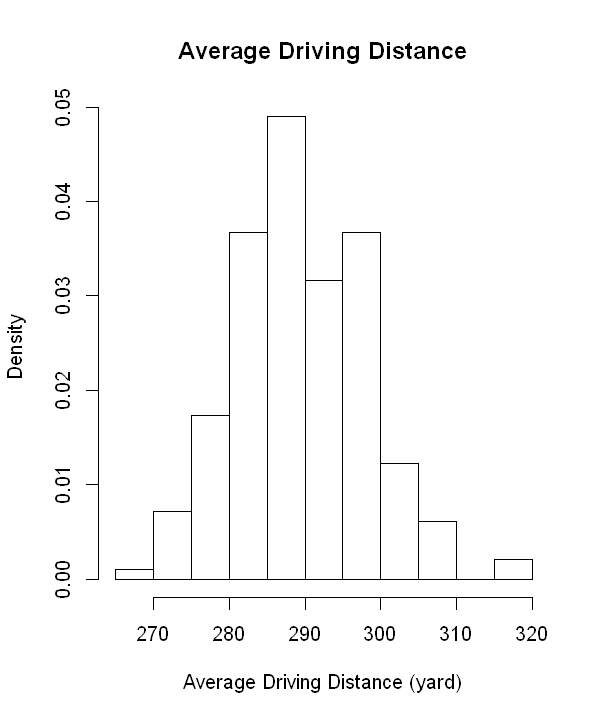

In [111]:
hist(pga$AveDrivingDistance, prob = T, main = 'Average Driving Distance', xlab = 'Average Driving Distance (yard)')
options(repr.plot.width=5, repr.plot.height=6)

### (1d) Normal plot of AveDrivingDistance

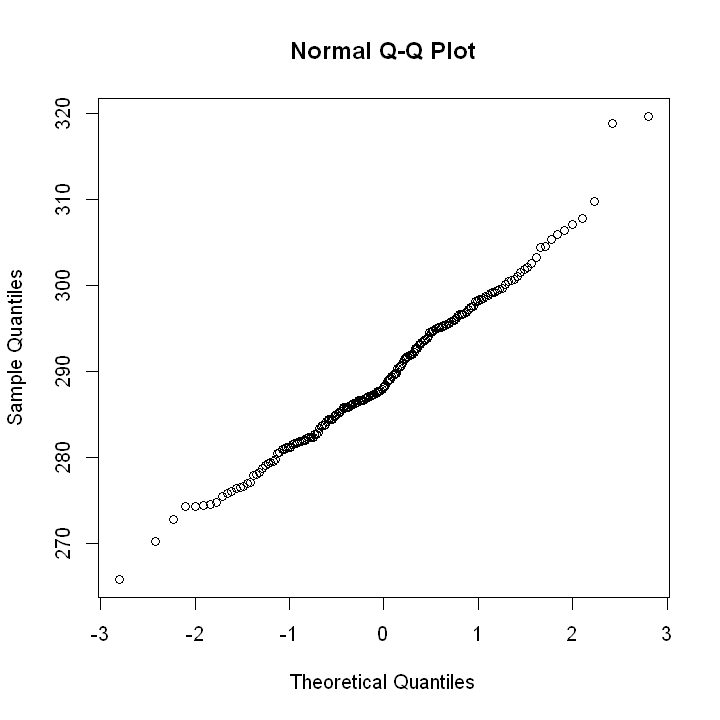

In [110]:
qqnorm(pga$AveDrivingDistance)
options(repr.plot.width=5, repr.plot.height=6)

### (1e) Fit a model

#### Normal plot

In [11]:
fitPgaNorm <- fitdist(pga$AveDrivingDistance, "norm")

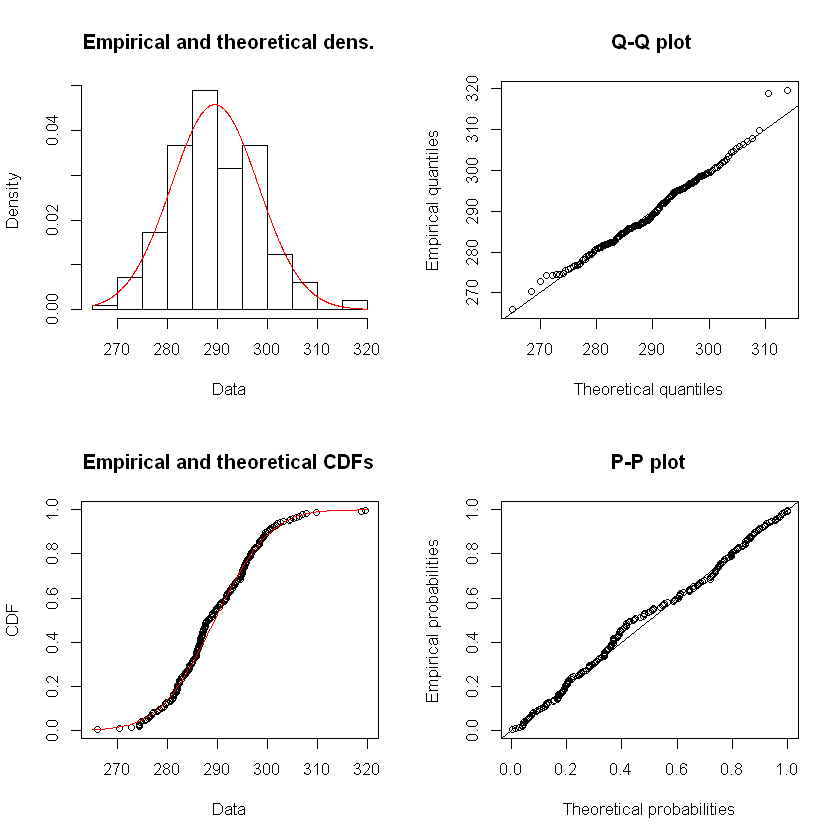

In [12]:
plot(fitPgaNorm)

In [13]:
fitPgaNorm

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
       estimate Std. Error
mean 289.498469  0.6220149
sd     8.708209  0.4398310

### (1f) 75th percentile of AveDrivingDistance from quantile command

In [14]:
quantile(pga$AveDrivingDistance, 0.75)

75% 
295.525

### (1g) 75th percentile of AveDrivingDistance from fitted model

In [15]:
qnorm(0.75, 289.498, 8.708)

[1] 295.3715

### (1h) Bootstrap the 75th percentile

In [29]:
thirdQuartile <- function(d, i){
    return(quantile(d[i], 0.75))
}
thirdQuartileBoot <- boot(data = pga$AveDrivingDistance, statistic = thirdQuartile, R = 500)
thirdQuartileBoot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = pga$AveDrivingDistance, statistic = thirdQuartile, 
    R = 500)


Bootstrap Statistics :
    original  bias    std. error
t1*  295.525 0.03765    0.690409

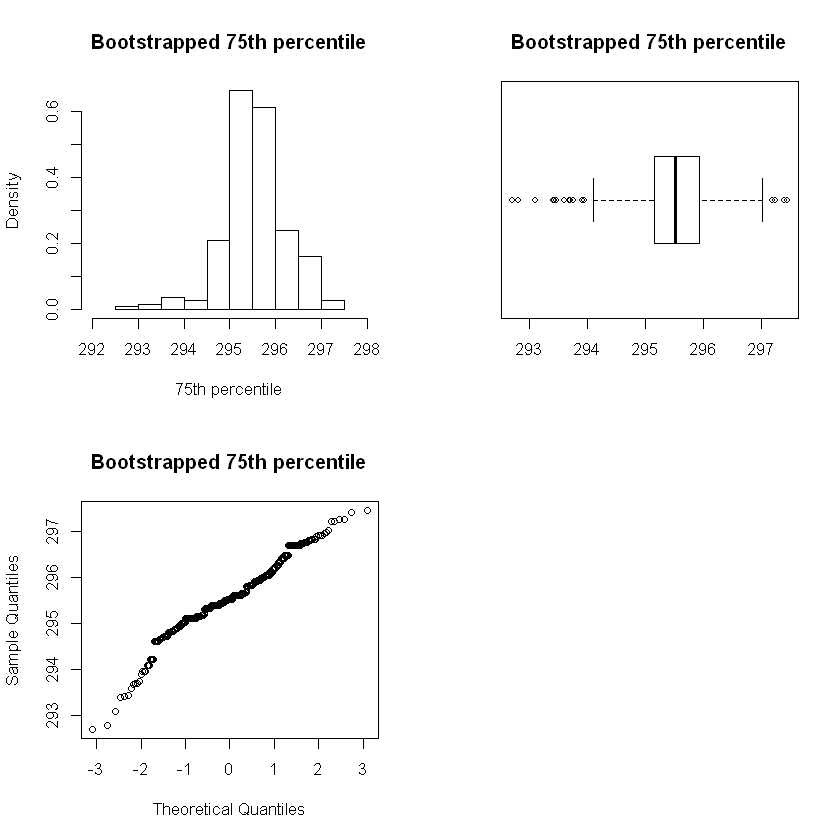

In [117]:
par(mfrow = c(2,2))
hist(thirdQuartileBoot$t, freq = F, main = "Bootstrapped 75th percentile", xlab = "75th percentile", xlim = c(292,298))
boxplot(thirdQuartileBoot$t, horizontal = T, main = "Bootstrapped 75th percentile")
qqnorm(thirdQuartileBoot$t, main = "Bootstrapped 75th percentile")
options(repr.plot.width=7, repr.plot.height=7)

### (1i) Shape of sampling distribution of sample 75th percentile

The sampling distribution of the sample 75th percentile resembles a normal distribution. There are a few outliers and 2 extreme outliers out of 500 data points.

### (1j) 5th and 95th percentiles of sampling distribution of sample 75th percentile

In [56]:
quantile(thirdQuartileBoot$t, 0.05)
quantile(thirdQuartileBoot$t, 0.95)

5% 
294.6

95% 
296.725

## 2. pgatour200.xlsx analysis

### (2a) Pairwise correlations

In [61]:
cor(pga[, 2:11])

,PrizeMoney,AveDrivingDistance,DrivingAccuracy,GIR,PuttingAverage,BirdieConversion,SandSaves,Scrambling,BounceBack,PuttsPerRound
PrizeMoney,1.00000000,0.15900129,0.024677039,0.41021935,-0.31305150,0.41342953,0.22187452,0.28472059,0.336200304,-0.11249143
AveDrivingDistance,0.15900129,1.00000000,-0.590599303,0.16460354,0.08595947,0.37568272,-0.23669494,-0.38033753,0.237508596,0.25656855
DrivingAccuracy,0.02467704,-0.59059930,1.000000000,0.41635604,-0.02558269,-0.25212523,0.03540773,0.39605968,0.001746659,0.06031385
GIR,0.41021935,0.16460354,0.416356043,1.00000000,0.05880737,0.02685014,-0.08107691,0.19435094,0.292759294,0.48083985
PuttingAverage,-0.31305150,0.08595947,-0.025582688,0.05880737,1.00000000,-0.76795939,-0.26509212,-0.19894278,-0.318567233,0.79168281
BirdieConversion,0.41342953,0.37568272,-0.252125225,0.02685014,-0.76795939,1.00000000,0.13050563,-0.02891616,0.482625137,-0.50072564
SandSaves,0.22187452,-0.23669494,0.035407734,-0.08107691,-0.26509212,0.13050563,1.00000000,0.49626530,0.026284174,-0.42046979
Scrambling,0.28472059,-0.38033753,0.396059676,0.19435094,-0.19894278,-0.02891616,0.49626530,1.00000000,0.087693355,-0.41558527
BounceBack,0.33620030,0.23750860,0.001746659,0.29275929,-0.31856723,0.48262514,0.02628417,0.08769336,1.000000000,-0.13501883
PuttsPerRound,-0.11249143,0.25656855,0.060313852,0.48083985,0.79168281,-0.50072564,-0.42046979,-0.41558527,-0.135018830,1.00000000


### (2b) Create and add natural logarithm of PrizeMoney to dataframe

In [62]:
lnPrize <- log(pga$PrizeMoney)
pga$lnPrize <- lnPrize

### (2c) Correlation of lnPrize with all variables except for PrizeMoney

In [65]:
cor(lnPrize, pga[, 3:11])

AveDrivingDistance,DrivingAccuracy,GIR,PuttingAverage,BirdieConversion,SandSaves,Scrambling,BounceBack,PuttsPerRound
0.07587079,0.1816729,0.5048932,-0.4301117,0.4673991,0.2414879,0.3671877,0.401781,-0.183298


### (2d) Scatterplot of lnPrize versus GIR with LOESS line. Identify outliers + summarize.

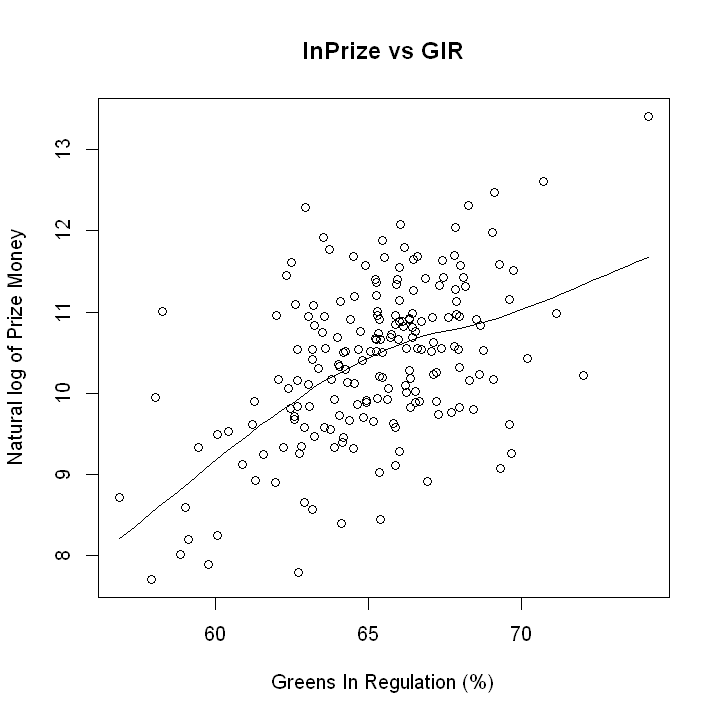

In [151]:
GIR <- pga$GIR
options(repr.plot.width=6, repr.plot.height=6)
scatter.smooth(GIR, lnPrize, main = "lnPrize vs GIR", xlab = "Greens In Regulation (%)", ylab = "Natural log of Prize Money")

The scatterplot demonstrates a moderate positive linear relationship between Natural log of Prize Money and Greens in Regulation (r = 0.505). There are no obvious outliers.

### (2e) Bootstrap sampling distribution of correlation between lnPrize and GIR

In [152]:
corre <- function(x, i){
    return(cor(x$lnPrize[i], x$GIR[i]))
}
correBoot <- boot(data = pga, statistic = corre, R = 500)
correBoot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = pga, statistic = corre, R = 500)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5048932 -0.002715594  0.06426313

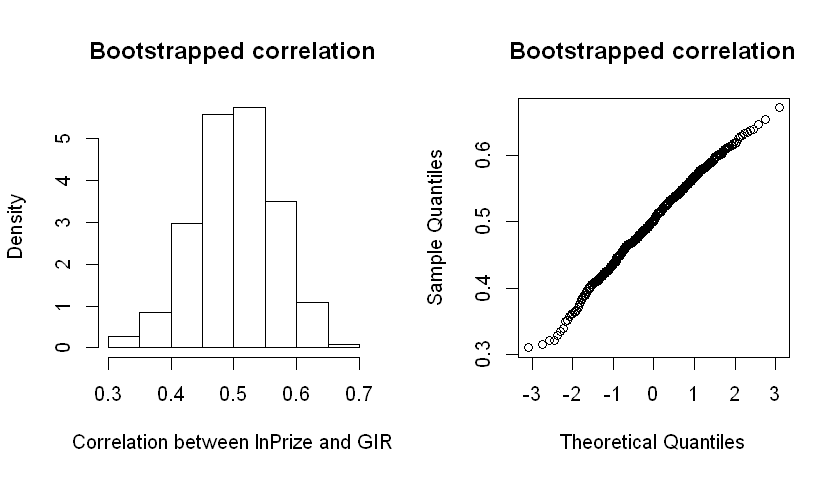

In [153]:
par(mfrow = c(1,2))
options(repr.plot.width=7, repr.plot.height=4)
hist(correBoot$t, freq = F, main = "Bootstrapped correlation", xlab = "Correlation between lnPrize and GIR")
qqnorm(correBoot$t, main = "Bootstrapped correlation")

### (2f) Fit the model lnPrize~GIR

In [154]:
lnPrizeGIR <- lm(lnPrize~GIR)

In [155]:
summary(lnPrizeGIR)


Call:
lm(formula = lnPrize ~ GIR)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13396 -0.55742  0.06891  0.52960  2.32133 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.47207    1.45580  -1.011    0.313    
GIR          0.18179    0.02231   8.147 4.49e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8483 on 194 degrees of freedom
Multiple R-squared:  0.2549,	Adjusted R-squared:  0.2511 
F-statistic: 66.37 on 1 and 194 DF,  p-value: 4.486e-14


#### Fitted equation: lnPrize = 0.18179 * GIR - 1.47207

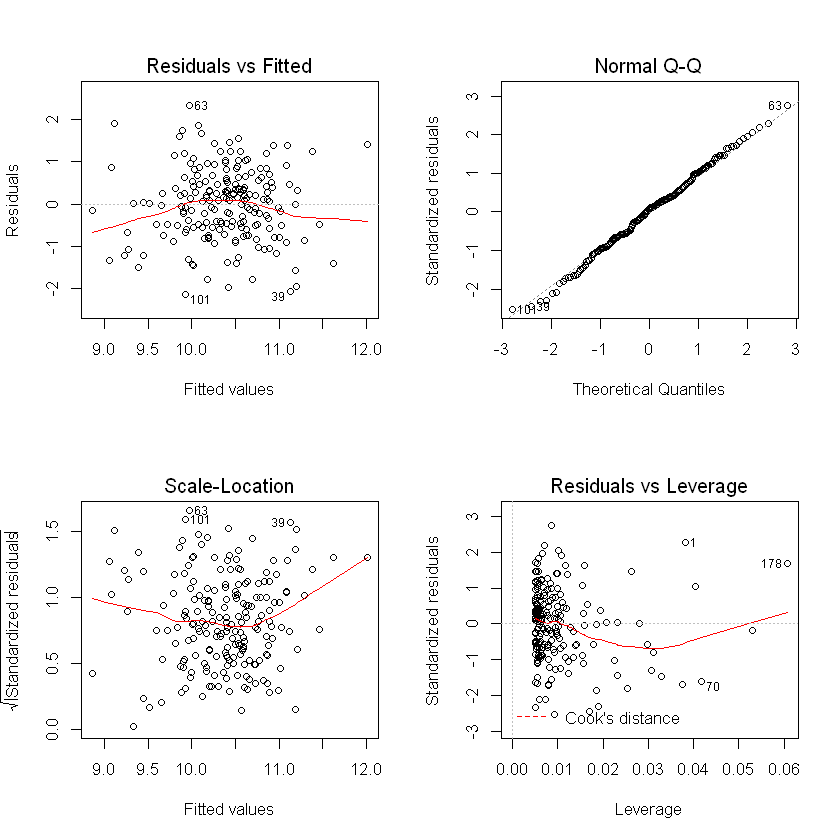

In [156]:
par(mfrow = c(2,2))
options(repr.plot.width=7, repr.plot.height=7)
plot(lnPrizeGIR)

### (2g) Estimate lnPrize when GIR = 65

In [161]:
predict.lm(lnPrizeGIR, data.frame(GIR=65), se.fit = T)

$fit
       1 
10.34425 

$se.fit
[1] 0.06073282

$df
[1] 194

$residual.scale
[1] 0.8482703

### (2h) Transform the fitted value in part 2g back to $ units

In [171]:
'$ unit'
exp(10.34425)

[1] "$ unit"

[1] 31077.83

## 3. Titanic-Survival-Data.xlsx analysis

### (3a) Summarize Age

In [3]:
titanic <- read_excel('Titanic-Survival-Data.xlsx')

In [4]:
str(titanic)

Classes 'tbl_df', 'tbl' and 'data.frame':	2201 obs. of  5 variables:
 $ Class       : chr  "Coach" "Coach" "Coach" "Coach" ...
 $ Gender      : chr  "Female" "Female" "Female" "Female" ...
 $ Age         : num  20 21 26 26 36 41 41 45 45 48 ...
 $ Status      : chr  "Survived" "Survived" "Survived" "Died" ...
 $ ChildorAdult: chr  "Adult" "Adult" "Adult" "Adult" ...


#### 10% trimmed mean

In [5]:
mean(titanic$Age, trim = 0.1)

[1] 47.45997

#### Standard Deviation

In [6]:
sd(titanic$Age)

[1] 19.59762

In [7]:
summary(titanic$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   31.00   48.00   47.12   64.00   80.00 

### (3b) Tabulate survivors vs non-survivors

In [8]:
table(titanic$Status)


    Died Survived 
    1490      711 

### (3c) Tabulate males vs females

In [9]:
table(titanic$Gender)


Female   Male 
   470   1731 

### (3d) Tabulate the number in each pasenger class

In [10]:
table(titanic$Class)


Coach First 
 1876   325 

### (3e) Cross-tabulate survivors vs non-survivors by gender

In [11]:
table(titanic$Status, titanic$Gender)

          
           Female Male
  Died        126 1364
  Survived    344  367

### (3f) Cross-tabulate survivors vs non-survivors by passenger class

In [12]:
table(titanic$Status, titanic$Class)

          
           Coach First
  Died      1368   122
  Survived   508   203

### (3g) Cross-tabulate survivors vs non-survivors by ChildorAdult

In [13]:
table(titanic$Status, titanic$ChildorAdult)

          
           Adult Child
  Died      1438    52
  Survived   654    57

### (3h) Estimate proportion of males that survived and its standard error

#### Sample proportion

In [14]:
pMale <- 367/(367 + 1364)
pMale

[1] 0.2120162

#### Estimated standard error

In [15]:
SEpMale <- sqrt(pMale*(1-pMale)/(367 + 1364))
SEpMale

[1] 0.009824142

### (3i) Estimate proportion of females that survived and its standard error

#### Sample proportion

In [16]:
pFemale <- 344/(344 + 126)
pFemale

[1] 0.7319149

#### Estimated standard error

In [17]:
SEpFemale <- sqrt(pFemale*(1-pFemale)/(344 + 126))
SEpFemale

[1] 0.02043232

### (3j) Estimate probability of survival for children and its standard error

#### Sample proportion

In [18]:
pCoach <- 508/(508 + 1368)
pCoach

[1] 0.2707889

#### Estimated standard error

In [19]:
SEpCoach <- sqrt(pCoach*(1-pCoach)/(344 + 126))
SEpCoach

[1] 0.02049713

### (3k) Estimate proportion of coach class passengers that survived and standard error

#### Sample proportion

In [53]:
pChild <- 57/(52+57)
pChild

[1] 0.5229358

#### Estimated standard error

In [57]:
SEpChild <- sqrt(pChild*(1-pChild)/(52 + 57))
SEpChild

[1] 0.0478409

## 4. Titanic-Survival-Data.xlsx analysis

### (4a) Estimate median age of males that survive

#### Subset male survivors

In [42]:
maleSurvivors = subset(titanic, Gender == 'Male')

#### Median age of male survivors

In [43]:
median(maleSurvivors$Age)

[1] 48

### (4b) Estimate median age of females that survive

#### Subset female survivors

In [44]:
femaleSurvivors = subset(titanic, Gender == 'Female')

#### Median age of female survivors

In [45]:
median(femaleSurvivors$Age)

[1] 47

### (4b) Bootstrap sampling distribution of median age of males that survived

In [56]:
medianFc <- function(x, i){
    return(median(x[i]))
}
medianMaleBoot <- boot(data = maleSurvivors$Age, statistic = medianFc, 500)
medianMaleBoot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = maleSurvivors$Age, statistic = medianFc, R = 500)


Bootstrap Statistics :
    original  bias    std. error
t1*       48   0.346   0.8876146

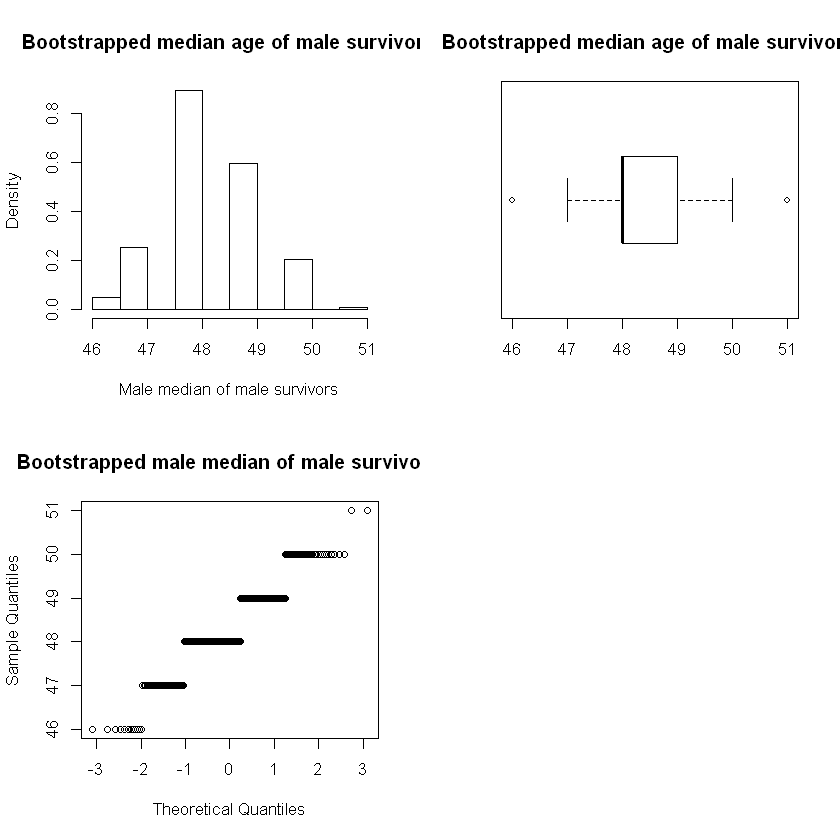

In [48]:
par(mfrow = c(2,2))
options(repr.plot.width=7, repr.plot.height=7)
hist(medianMaleBoot$t, freq = F, main = "Bootstrapped median age of male survivors", xlab = "Male median of male survivors")
boxplot(medianMaleBoot$t, horizontal = T, main = "Bootstrapped median age of male survivors")
qqnorm(medianMaleBoot$t, main = "Bootstrapped male median of male survivors")

In [55]:
str(medianMaleBoot$t)

 num [1:500, 1] 47 48 49 47 49 47 48 48 50 48 ...


### (4c) Bootstrap sampling distribution of median age of females that survived

In [58]:
medianFemaleBoot <- boot(data = femaleSurvivors$Age, statistic = medianFc, 500)
medianFemaleBoot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = femaleSurvivors$Age, statistic = medianFc, R = 500)


Bootstrap Statistics :
    original  bias    std. error
t1*       47   -0.05    1.324011

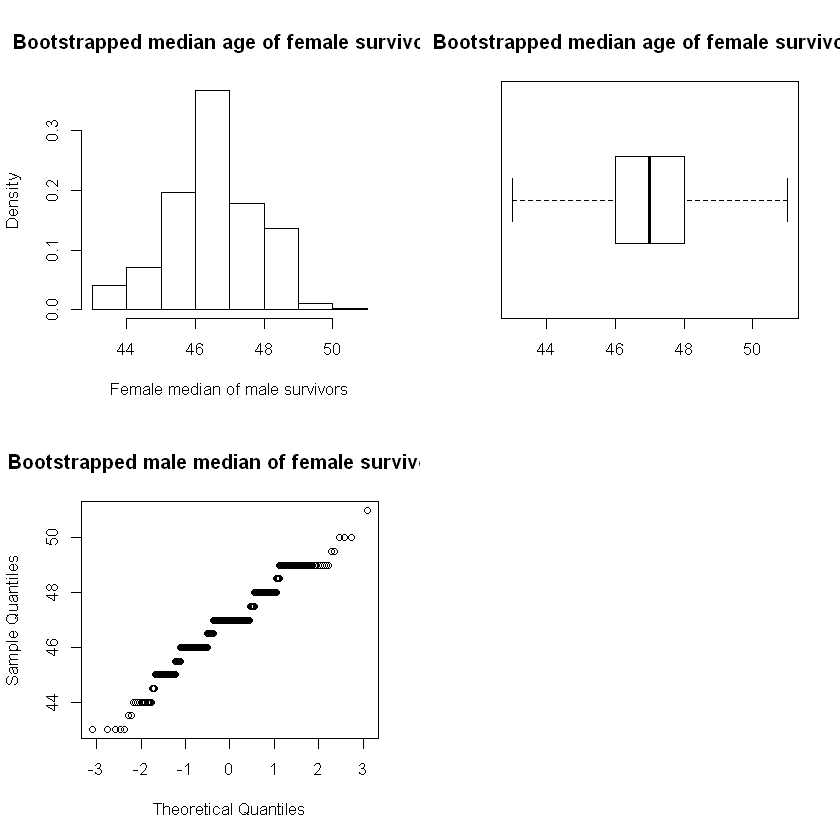

In [59]:
par(mfrow = c(2,2))
options(repr.plot.width=7, repr.plot.height=7)
hist(medianFemaleBoot$t, freq = F, main = "Bootstrapped median age of female survivors", xlab = "Female median of male survivors")
boxplot(medianFemaleBoot$t, horizontal = T, main = "Bootstrapped median age of female survivors")
qqnorm(medianFemaleBoot$t, main = "Bootstrapped male median of female survivors")

In [60]:
str(medianFemaleBoot$t)

 num [1:500, 1] 46 47 47 48 46 47 46 46 47 47 ...
